In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
# x_train[0]

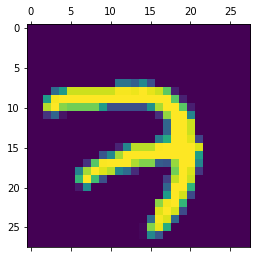

In [7]:
plt.matshow(x_train[5000])

In [8]:
y_train[5000]

7

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flattned = x_train.reshape(len(x_train),28*28)
x_test_flattned = x_test.reshape(len(x_test),28*28)
x_train_flattned.shape

(60000, 784)

In [12]:
x_test_flattned.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattned,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4646 - accuracy: 0.8805
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3029 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.9261


In [14]:
model.evaluate(x_test_flattned,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2670 - accuracy: 0.9249


[0.2670022249221802, 0.9248999953269958]

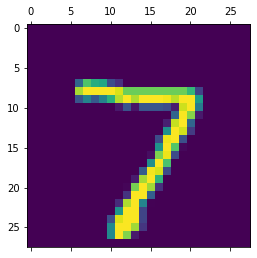

In [15]:
plt.matshow(x_test[0])

In [16]:
y_predicted = model.predict(x_test_flattned)
y_predicted[0]

array([2.3072496e-02, 2.4720302e-07, 4.6883710e-02, 9.6365774e-01,
       3.1539181e-03, 1.5815161e-01, 2.3872074e-06, 9.9986565e-01,
       1.0035964e-01, 7.1157235e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_lables = [np.argmax(i) for i in y_predicted]
y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,
    predictions=y_predicted_lables)

In [20]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [   8,    8,  919,   17,    8,    5,   13,   11,   39,    4],
       [   4,    0,   17,  918,    0,   27,    3,   13,   21,    7],
       [   1,    1,    2,    1,  919,    0,   13,    4,   10,   31],
       [   8,    2,    2,   28,    9,  786,   15,    6,   30,    6],
       [  11,    3,    3,    1,    7,   11,  918,    2,    2,    0],
       [   1,    5,   20,    6,    7,    0,    0,  957,    4,   28],
       [   7,    6,    6,   24,    9,   30,   10,   14,  858,   10],
       [  11,    7,    1,    9,   32,    9,    0,   33,    3,  904]])>

Text(69.0, 0.5, 'Truth')

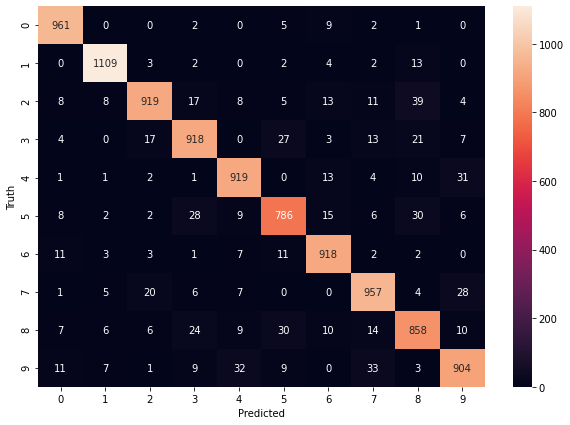

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattned,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9752: 0s -
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9843: 0s -


In [23]:
model.evaluate(x_test_flattned,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9769


[0.07439757883548737, 0.9768999814987183]

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500, kernel_initializer='he_normal' ,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(600, kernel_initializer='he_uniform' ,activation='relu'),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(10, kernel_initializer='glorot_uniform' ,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=20,batch_size=30)

Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2462 - accuracy: 0.9241
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1288 - accuracy: 0.9598
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1020 - accuracy: 0.9684
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0876 - accuracy: 0.9725
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0793 - accuracy: 0.9762
Epoch 6/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0710 - accuracy: 0.9785
Epoch 7/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9806
Epoch 8/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0620 - accuracy: 0.9815
Epoch 9/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9819
Epoch 10/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.056

In [53]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9821


[0.09878633171319962, 0.9821000099182129]

In [54]:
y_predicted = model.predict(x_test)
y_predicted[0]
np.argmax(y_predicted[0])

7